In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [45]:
data = pd.read_csv(r'C:\Users\Ojaswi\Machine Learning\Grocery_Sales_ParticipantsData\train.csv')
data_test = pd.read_csv(r'C:\Users\Ojaswi\Machine Learning\Grocery_Sales_ParticipantsData\test.csv')

In [4]:
data.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [5]:
data.shape

(692, 2)

In [46]:
data_test.shape

(90, 1)

In [52]:
X = data.as_matrix(['Day'])
y = data.as_matrix(['GrocerySales'])


C:\Users\Ojaswi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Ojaswi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [55]:
print("Mean X =" ,np.mean(X))
print("Median X =" ,np.median(X))
print("Mean y =" ,np.mean(y))
print("Median y =" ,np.median(y))
print("Std X =" ,np.std(X))
print("Std y =" ,np.std(y))

Mean X = 346.5
Median X = 346.5
Mean y = 8564.73347059279
Median y = 8677.77
Std X = 199.76298455920207
Std y = 428.50571837518436


Grocery sale data is skewed which shows the presence of an outlier

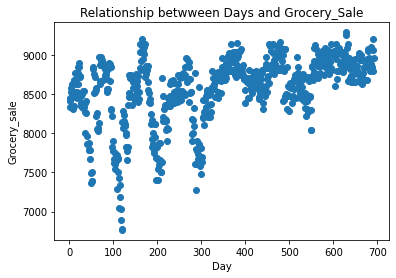

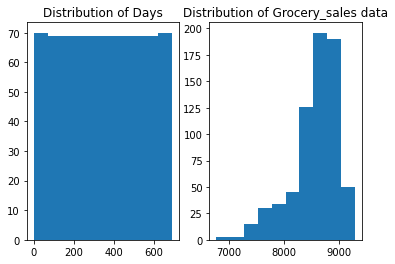

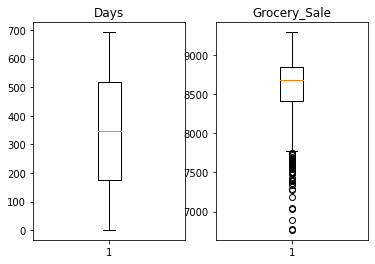

In [67]:
plt.title('Relationship betwween Days and Grocery_Sale')
plt.scatter(x= X, y = y)
plt.xlabel('Day')
plt.ylabel('Grocery_sale')
plt.show()

plt.subplot(1, 2, 1)
plt.title('Distribution of Days')
plt.hist(X)

plt.subplot(1, 2, 2)
plt.title('Distribution of Grocery_sales data')
plt.hist(y)
plt.show()

plt.subplot(1, 2, 1)
plt.title('Days')
plt.boxplot(X)

plt.subplot(1, 2, 2)
plt.title('Grocery_Sale')
plt.boxplot(y)
plt.show()

There are outliers in the Grocery_sale data therefore we have seen that it is rightly skewed.

In [6]:
data.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


In [12]:
data.isnull().any()

Day             False
GrocerySales    False
dtype: bool

In [38]:
data.corr()

,Day,GrocerySales
Day,1.000000,0.499172
GrocerySales,0.499172,1.000000


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 101)

In [70]:
lm_model = LinearRegression()

In [71]:
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print("R2", lm_model.score(X_train, y_train))
print("Correlation", math.sqrt(lm_model.score(X_train, y_train)))

R2 0.25526317514746033
Correlation 0.5052357619443227


In [83]:
#Coefficient for single feature
print("Coefiicient", lm_model.coef_)

print("Standard error", st.sem(X_train))

ttest = lm_model.coef_/st.sem(X_train)
print("t-test value", ttest)

print('Two tailed p value', st.pearsonr(X_train, y_train))

Coefiicient [[1.06165021]]
Standard error [9.12710273]
t-test value [[0.11631842]]
Two tailed p value (array([0.50523576]), array([1.01577892e-32]))


In [86]:
# This the F-statistic that shows whether there is a relationship between the response and the predictors
# I couldn't find a function for this so I have done the calcs by hand
# First get the total sum of the squares.
TSS = y_train
TSS = [i**2 for i in TSS]   # Using list comprehension to square each element
TSS = np.sum(TSS)

# This calculates the residual sum of the squares
y_predicted = lm_model.predict(X_train)   # These are predicted values of Y
y_variance = y_train - y_predicted # These are the residuals bewteen actual values of Y and the predcitions
y_variance = [i**2 for i in y_variance]   # Using list comprehension to square each element
RSS = np.sum(y_variance)

# As we only have one feature the f-statistic formula = ((TSS -RSS)/p)/(RSS/(n - p -1)) becomes
#(TSS - RSS)/(RSS/ (n - 2) )
Fstatistic = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print ("The F-statistic is:  ", Fstatistic)

The F-statistic is:   267711.97706607904


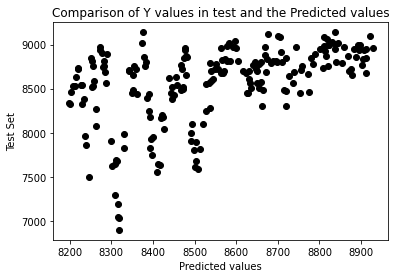

In [87]:
y_predicted = lm_model.predict(X_test)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test,  color='black')
plt.show()

In [88]:
lm_model.intercept_

array([8194.27281987])

In [89]:
mse = mean_squared_error(y_test, pred)

In [90]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
print("r2 score:", r2_score(y_test,pred))

Mean squared error: 150825.46
r2 score: 0.2354776184819516


Text(0, 0.5, 'Predicted')

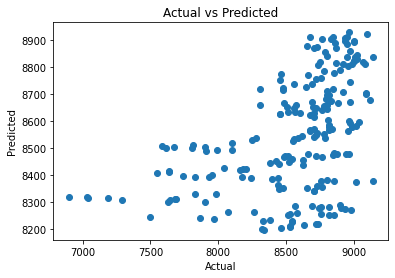

In [91]:
plt.scatter(x = y_test, y = pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [115]:
data_test.head()

,Day
0,693
1,694
2,695
3,696
4,697


In [102]:
X_t = data_test.as_matrix(['Day'])
X_t

C:\Users\Ojaswi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[693],
       [694],
       [695],
       [696],
       [697],
       [698],
       [699],
       [700],
       [701],
       [702],
       [703],
       [704],
       [705],
       [706],
       [707],
       [708],
       [709],
       [710],
       [711],
       [712],
       [713],
       [714],
       [715],
       [716],
       [717],
       [718],
       [719],
       [720],
       [721],
       [722],
       [723],
       [724],
       [725],
       [726],
       [727],
       [728],
       [729],
       [730],
       [731],
       [732],
       [733],
       [734],
       [735],
       [736],
       [737],
       [738],
       [739],
       [740],
       [741],
       [742],
       [743],
       [744],
       [745],
       [746],
       [747],
       [748],
       [749],
       [750],
       [751],
       [752],
       [753],
       [754],
       [755],
       [756],
       [757],
       [758],
       [759],
       [760],
       [761],
       [762],
       [763],
      

In [129]:
predictions = lm_model.predict(X_t)
result = pd.DataFrame({'Grocery_Sale': predictions}, )
result.head()

ValueError: If using all scalar values, you must pass an index

In [92]:
#writing the output in csv 
result.to_csv('output/Grocery_sale-predictions.csv', index = False)

NameError: name 'result' is not defined